# Data Analysis Assignment - Week 7

## Objective
This notebook demonstrates data loading, exploration, analysis, and visualization using pandas and matplotlib libraries with the Iris dataset.

### Assignment Tasks:
1. Load and explore the dataset
2. Basic data analysis
3. Data visualization with 4 different chart types

---

## Import Required Libraries
First, let's import all the necessary libraries for our analysis.

In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings

# Set up matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## Task 1: Load and Explore the Dataset

We'll use the classic Iris dataset which contains measurements of iris flowers from three different species.

In [16]:
# Load the Iris dataset with error handling
try:
    # Load iris dataset from sklearn
    iris_data = load_iris()
    
    # Create a pandas DataFrame
    df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    df['species'] = iris_data.target
    df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
    
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully!
Dataset shape: (150, 6)


In [3]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
# Explore the structure of the dataset
print("Dataset Information:")
print("=" * 40)
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nData Types:")
print(df.dtypes)
print("\nDataset Info:")
df.info()

Dataset Information:
Shape: (150, 6)
Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species', 'species_name']

Data Types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
species_name          object
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Check for missing values
print("Missing Values Check:")
print("=" * 30)
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\n✓ No missing values found in the dataset!")
else:
    print(f"\n⚠ Found {missing_values.sum()} missing values")
    # Handle missing values if any exist
    df_cleaned = df.dropna()  # or df.fillna(df.mean()) for numerical columns
    print(f"Dataset cleaned. New shape: {df_cleaned.shape}")

Missing Values Check:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

✓ No missing values found in the dataset!


## Task 2: Basic Data Analysis

Let's perform basic statistical analysis on our dataset.

In [6]:
# Compute basic statistics for numerical columns
print("Basic Statistics for Numerical Columns:")
print("=" * 45)
numerical_stats = df.describe()
numerical_stats

Basic Statistics for Numerical Columns:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# Group by species and compute mean values
print("Mean values grouped by Species:")
print("=" * 35)
species_means = df.groupby('species_name').mean()
species_means

Mean values grouped by Species:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
species_name,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


In [8]:
# Additional analysis - species distribution
print("Species Distribution:")
print("=" * 25)
species_count = df['species_name'].value_counts()
print(species_count)

print("\nSpecies Percentages:")
species_percentage = df['species_name'].value_counts(normalize=True) * 100
print(species_percentage.round(2))

Species Distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Species Percentages:
species_name
setosa        33.33
versicolor    33.33
virginica     33.33
Name: proportion, dtype: float64


In [9]:
# Correlation analysis
print("Correlation Matrix:")
print("=" * 20)
correlation_matrix = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()
correlation_matrix

Correlation Matrix:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Key Findings from Basic Analysis:

1. **Dataset Overview**: The Iris dataset contains 150 samples with 4 numerical features and 3 species
2. **No Missing Data**: The dataset is clean with no missing values
3. **Balanced Dataset**: Each species has exactly 50 samples (33.33% each)
4. **Species Differences**: Clear differences in mean measurements between species
5. **Strong Correlations**: Petal length and width show strong positive correlation (0.96)

## Task 3: Data Visualization

Now let's create four different types of visualizations to understand our data better.

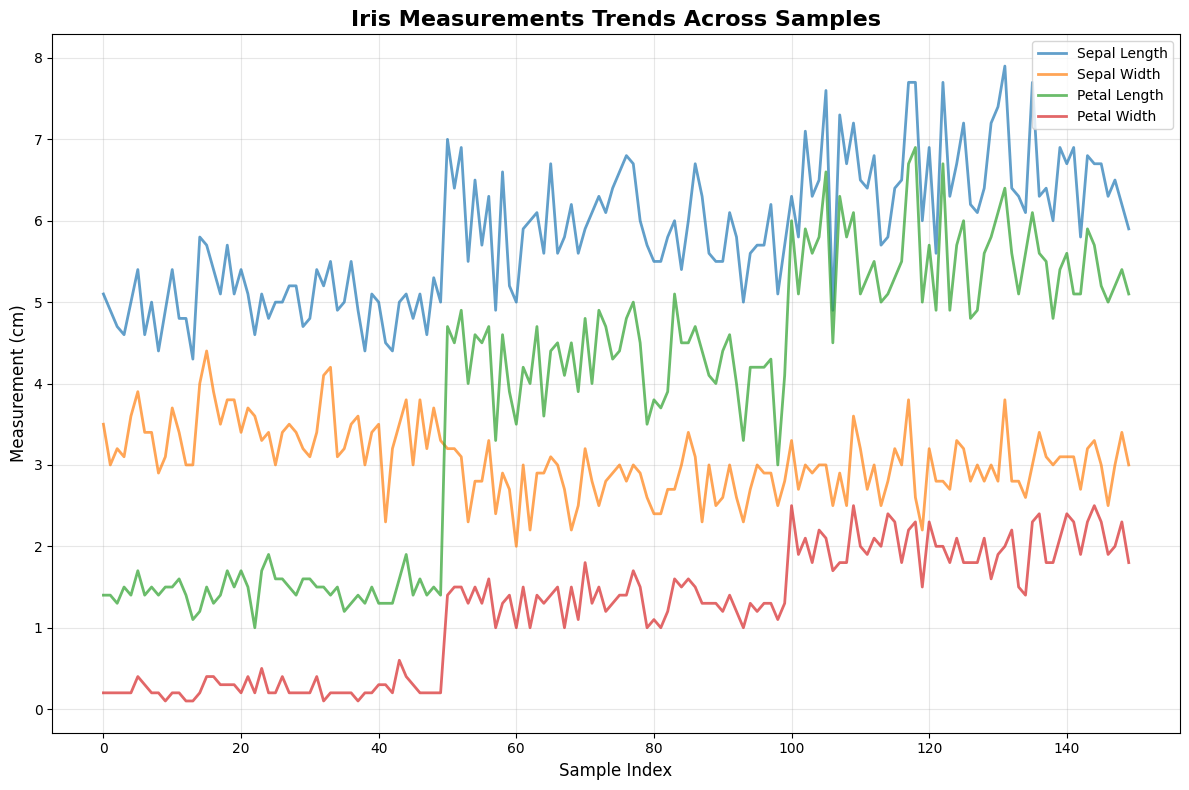

Line Chart: Shows how measurements vary across different samples in the dataset.


In [10]:
# 1. Line Chart - Trends across samples (index as time-like variable)
plt.figure(figsize=(12, 8))

# Create line plot for each measurement across samples
plt.plot(df.index, df['sepal length (cm)'], label='Sepal Length', linewidth=2, alpha=0.7)
plt.plot(df.index, df['sepal width (cm)'], label='Sepal Width', linewidth=2, alpha=0.7)
plt.plot(df.index, df['petal length (cm)'], label='Petal Length', linewidth=2, alpha=0.7)
plt.plot(df.index, df['petal width (cm)'], label='Petal Width', linewidth=2, alpha=0.7)

plt.title('Iris Measurements Trends Across Samples', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Measurement (cm)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Line Chart: Shows how measurements vary across different samples in the dataset.")

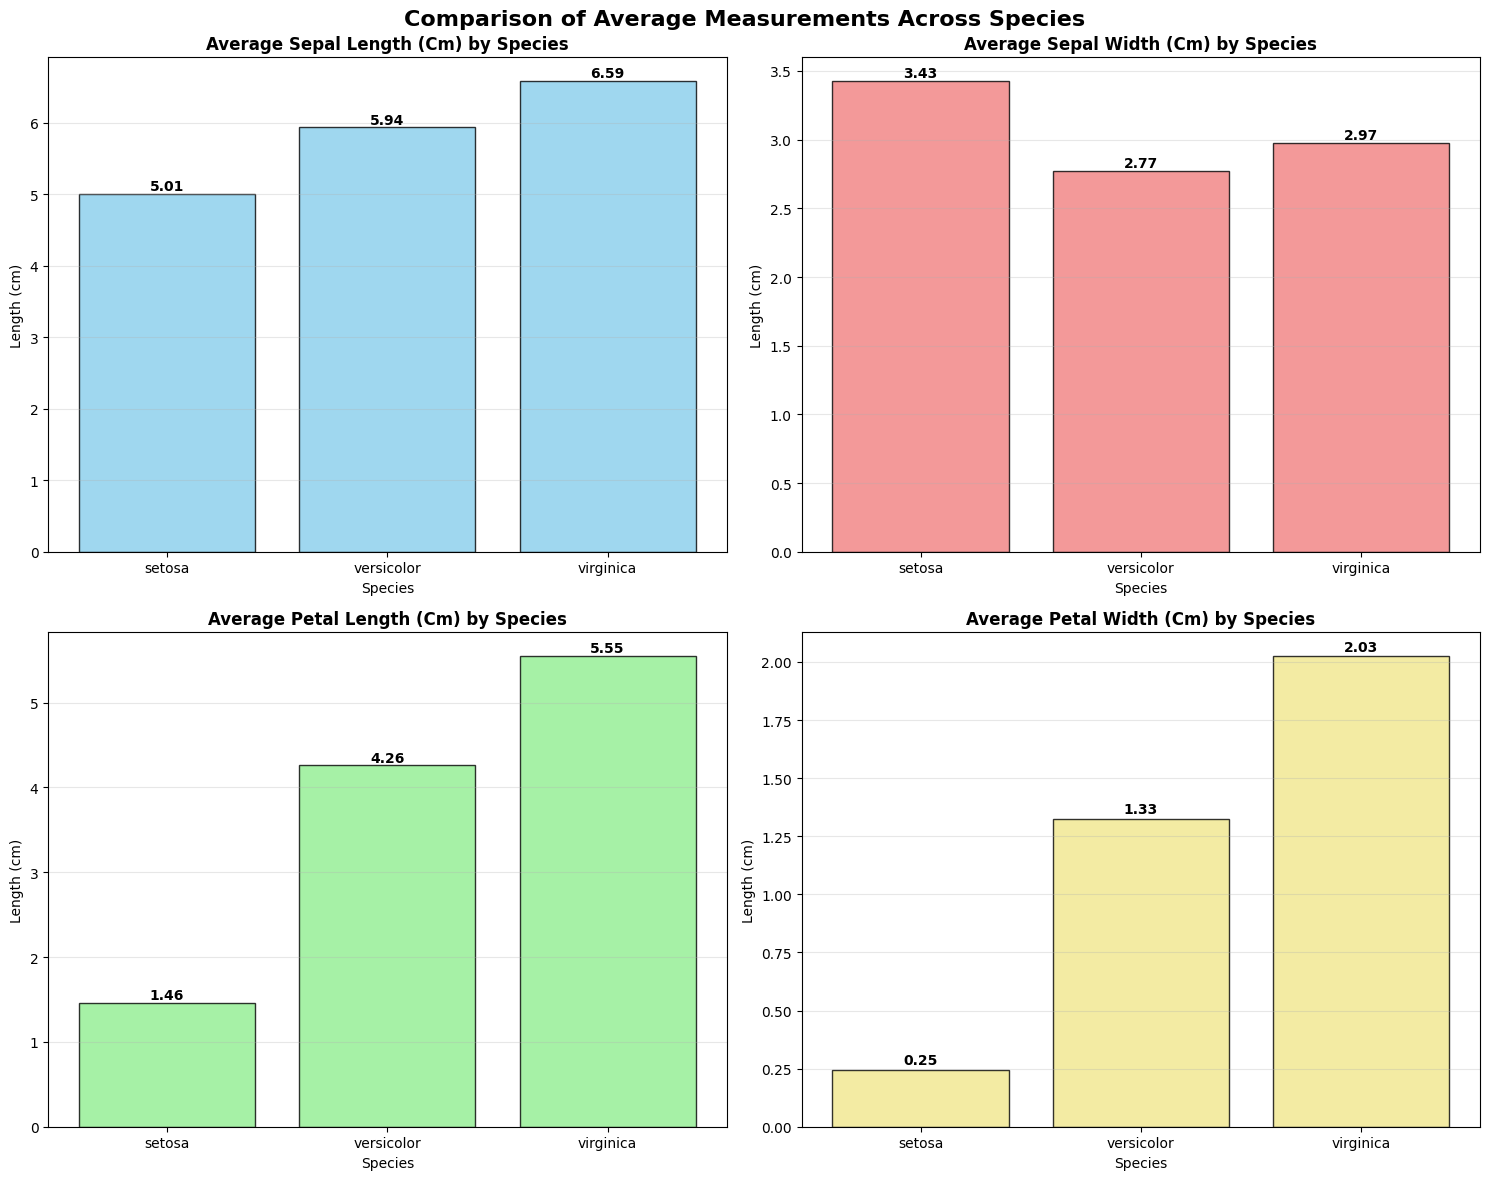

Bar Charts: Compare average measurements between the three iris species.


In [11]:
# 2. Bar Chart - Average measurements by species
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'khaki']

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    species_avg = df.groupby('species_name')[feature].mean()
    
    bars = ax.bar(species_avg.index, species_avg.values, color=colors[i], alpha=0.8, edgecolor='black')
    ax.set_title(f'Average {feature.title()} by Species', fontweight='bold')
    ax.set_ylabel('Length (cm)')
    ax.set_xlabel('Species')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold')
    
    ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('Comparison of Average Measurements Across Species', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Bar Charts: Compare average measurements between the three iris species.")

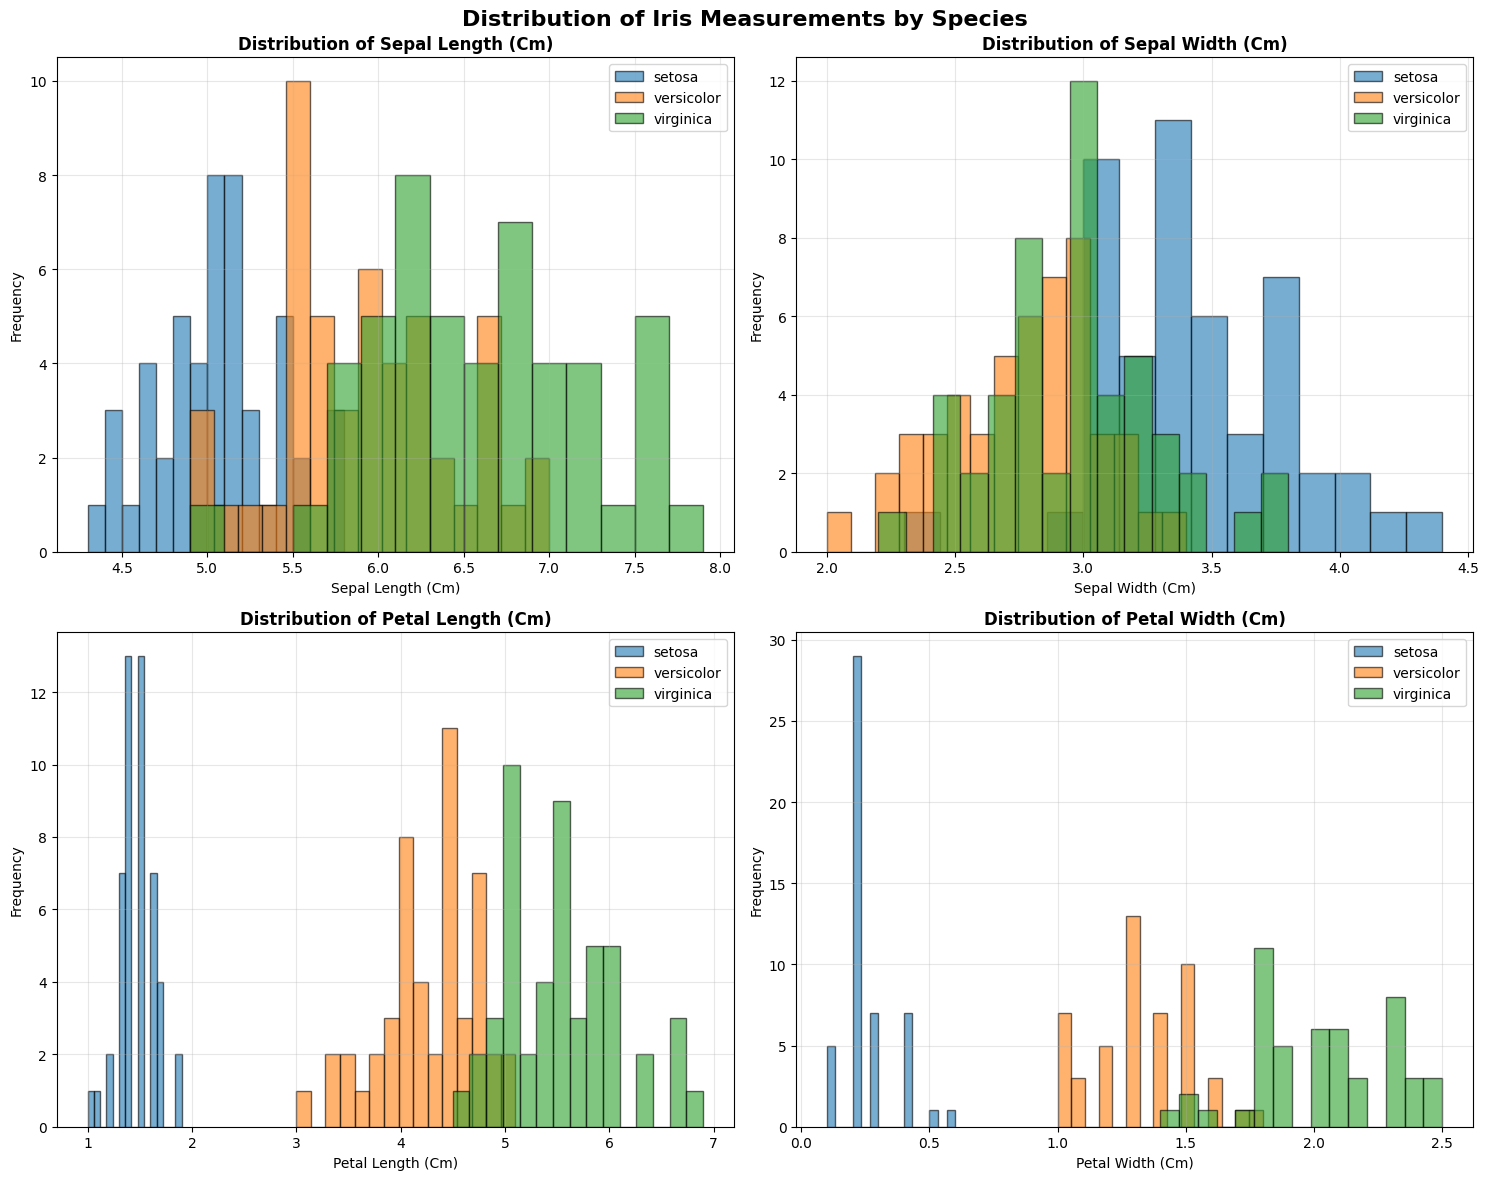

Histograms: Show the distribution of each measurement, with different colors for each species.


In [12]:
# 3. Histograms - Distribution of numerical columns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
colors = ['steelblue', 'darkorange', 'forestgreen', 'mediumpurple']

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    
    # Create histogram with multiple species
    for species in df['species_name'].unique():
        species_data = df[df['species_name'] == species][feature]
        ax.hist(species_data, alpha=0.6, label=species, bins=15, edgecolor='black')
    
    ax.set_title(f'Distribution of {feature.title()}', fontweight='bold')
    ax.set_xlabel(f'{feature.title()}')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Distribution of Iris Measurements by Species', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Histograms: Show the distribution of each measurement, with different colors for each species.")

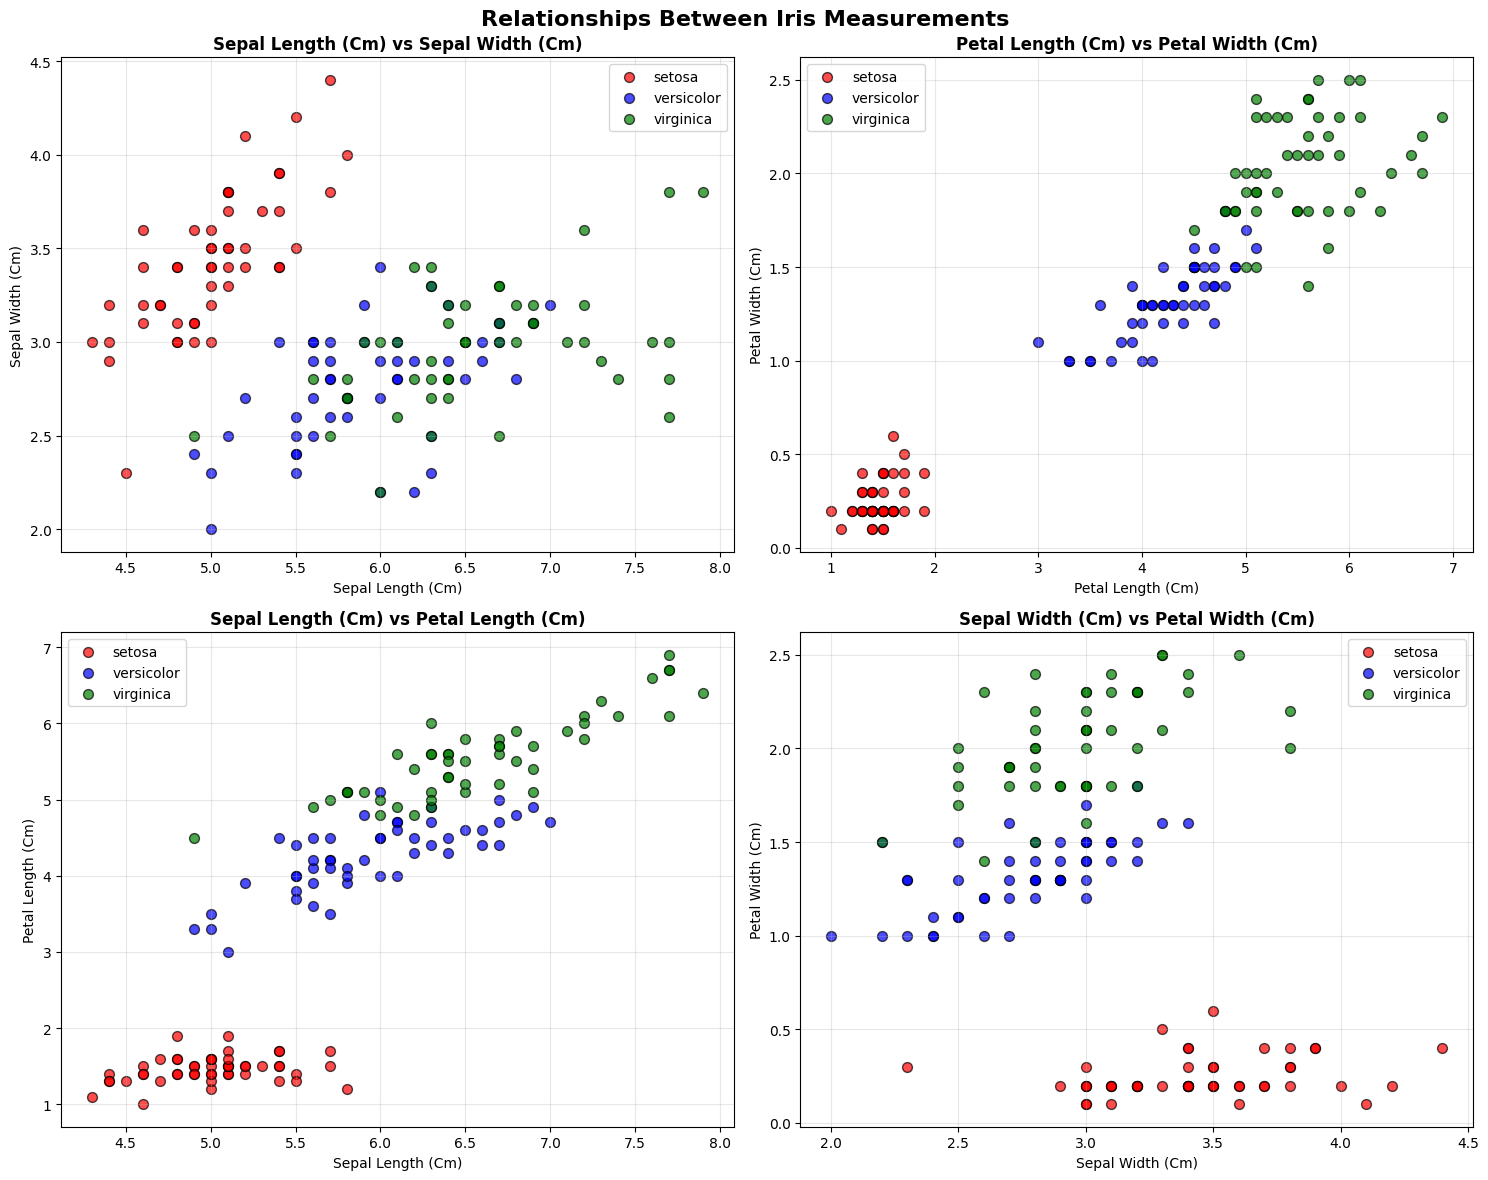

Scatter Plots: Reveal relationships between different measurements and species clustering.


In [13]:
# 4. Scatter Plots - Relationships between measurements
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Define scatter plot pairs
scatter_pairs = [
    ('sepal length (cm)', 'sepal width (cm)'),
    ('petal length (cm)', 'petal width (cm)'),
    ('sepal length (cm)', 'petal length (cm)'),
    ('sepal width (cm)', 'petal width (cm)')
]

colors_map = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}

for i, (x_feature, y_feature) in enumerate(scatter_pairs):
    ax = axes[i//2, i%2]
    
    # Create scatter plot for each species
    for species in df['species_name'].unique():
        species_data = df[df['species_name'] == species]
        ax.scatter(species_data[x_feature], species_data[y_feature], 
                  c=colors_map[species], label=species, alpha=0.7, s=50, edgecolors='black')
    
    ax.set_title(f'{x_feature.title()} vs {y_feature.title()}', fontweight='bold')
    ax.set_xlabel(x_feature.title())
    ax.set_ylabel(y_feature.title())
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Relationships Between Iris Measurements', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Scatter Plots: Reveal relationships between different measurements and species clustering.")

## Summary of Findings and Observations

### Dataset Characteristics:
- **Size**: 150 samples, 4 features, 3 species
- **Quality**: No missing values, well-balanced dataset
- **Features**: Sepal length/width and petal length/width measurements

### Key Insights:

1. **Species Separation**: 
   - Setosa is clearly distinguishable from the other two species
   - Versicolor and Virginica show some overlap but are generally separable

2. **Feature Relationships**:
   - Strong positive correlation between petal length and petal width (0.96)
   - Moderate correlation between sepal length and petal measurements
   - Sepal width shows weaker correlations with other features

3. **Species Characteristics**:
   - **Setosa**: Smallest petals, wider sepals relative to length
   - **Versicolor**: Medium-sized measurements
   - **Virginica**: Largest overall measurements, especially petals

4. **Distribution Patterns**:
   - Most features show approximately normal distributions
   - Clear species clustering visible in scatter plots
   - Petal measurements are most discriminative for species classification

### Practical Applications:
This analysis demonstrates that the Iris dataset is excellent for:
- Classification algorithms
- Feature importance analysis
- Data visualization techniques
- Understanding species differentiation patterns

---

**Assignment completed successfully!** ✅

This notebook demonstrates comprehensive data analysis including loading, exploration, statistical analysis, and multiple visualization techniques as required by the assignment.